<div align="center">

# Higher Diploma in Science in Computing (Data Analytics)
# Applied Statistics Module

</div>

# Table of Contents
***
1. Description
2. Explore the Problems 
    -   Problem 1: Extending the Lady Tasting Tea
    -   Problem 2: Normal Distribution
    -   Problem 3: t-Tests
    -   Problem 4: ANOVA
3. Conclusion

# 1. Description
***
The following notebook will outline all the Problems 1-4 for the Applied Statistics Module.

# 2. Explore the Problems
***

## Problem 1: Extending the Lady Tasting Tea

<div style="text-align: center;">
    <img src="./images/problem1_lady_tasting_tea.png" width="650" height="350" alt="Sublime's custom image">
</div>

###### [Image from Statistics Easily](https://statisticseasily.com/lady-tasting-tea)

#### Introduction

In the original experiment for [Lady Tasting Tea](https://en.wikipedia.org/wiki/Lady_tasting_tea) devised by [Ronald Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher), a lady claimed she could tell whether milk or tea was poured first into a cup. There were 8 cups:
4 poured milk-first and 4 poured tea-first. In this extended version, I increased the total to 12 cups: 8 poured tea-first and 4 poured milk-first.
I’ll use combinatorial reasoning and simulation to estimate the chance of getting all answers right by random guessing, and compare it to the
original experiment. 

#### Imports

In [1]:
# Mathematical functions from the standard library.
# https://docs.python.org/3/library/math.html
import math

# Permutations and combinations.
# https://docs.python.org/3/library/itertools.html
import itertools

# Random selections.
# https://docs.python.org/3/library/random.html
import random

# Numerical structures and operations.
# https://numpy.org/doc/stable/reference/index.html#reference
import numpy as np

# Plotting.
# https://matplotlib.org/stable/contents.html
import matplotlib.pyplot as plt

#### Experimental setup

In [2]:
# Number of cups of tea in total.
no_cups = 12

# Number of cups of tea with milk in first.
no_cups_milk_first = 4

# Number of cups of tea with tea in first.
no_cups_tea_first = 8

#### Combinatorial reasoning

The participant must choose 4 cups out of 12 that they believe were milk-first. The number of possible combinations (without regard to order) is "12 choose 4". The [Python math.comb()](https://docs.python.org/3/library/math.html#math.comb) method returns the number of ways to choose k items from n items without repetition and without order.

In [3]:
# Number of ways of selecting four cups from twelve
# https://www.tutorialspoint.com/python/python_math_comb_method.htm
# https://docs.python.org/3/library/math.html#math.comb
ways = math.comb(no_cups, no_cups_milk_first)

# Display the number of combinations
ways

495

There are 495 possible ways the participant could guess which 4 cups were milk-first. Thus, if they are purely guessing, the probability of getting them all correct by chance is 1/495 ≈ 0.00202 (about 0.2%).


#### Ordered selections (just for fun)

If we wanted to include the order of guesses.

In [4]:
# Total number of ways of selecting four cups from twelve, keeping them in order.
ways_ordered = 12 * 11 * 10 * 9

# Show.
ways_ordered

11880

So, 11,880 ordered selections exist, but in this experiment, the order doesn’t matter — only which cups are picked.

In [5]:
# No of ways of shuffling four cups.
# https://www.geeksforgeeks.org/python/python-ways-to-shuffle-a-list/
no_shuffles = 4 * 3 * 2 * 1

# Show.
no_shuffles

24

Dividing ordered selections by 4 gives back the number of combinations which is the same result as above

In [6]:
# No of combinations.
no_combs = ways_ordered // no_shuffles

# Show.
no_combs

495

Checking the combination formula manually using [math.factorial](https://docs.python.org/3/library/math.html#math.factorial)

In [7]:
# Number of cups of tea in total (n) Number of cups of tea with milk in first (k)
n = 12
k = 4

In [8]:
# Twelve factorial
# https://www.w3schools.com/python/ref_math_factorial.asp
# https://www.geeksforgeeks.org/python/factorial-in-python/
math.factorial(n)
print(f"The factorial of {n} is: {math.factorial(n)}")


The factorial of 12 is: 479001600


In [9]:
#Four factorial
math.factorial(k)
print(f"The factorial of {k} is: {math.factorial(k)}")

The factorial of 4 is: 24


The number of ways to choose **k** elements from a set of **n** distinct elements (without regard to order) is given by the combinations formula:

$$
\frac{n!}{k!(n-k)!}
$$

In [10]:
# No of ways of selecting k objects from n without replacement and without order. 
# Use the combination formula directly: n! / (k! * (n-k)!).
# https://coderivers.org/blog/n-choose-k-combinations-python/
result=math.factorial(n) // (math.factorial(k) * math.factorial(n - k))
print(f"The number of ways to choose {k} elements from {n} elements is: {result}")

The number of ways to choose 4 elements from 12 elements is: 495


This confirms the number of unique ways to choose 4 milk-first cups from 12 cups of tea is 495

#### Null Hypothesis Combinations

In this Lady Tasting Tea experiment, the [Null Hypothesis](https://en.wikipedia.org/wiki/Null_hypothesis) states that: The lady cannot actually tell the difference between tea poured first or milk poured first. That means any labeling or guessing she does is random, and all possible ways to choose which cups are milk-first are equally likely. 

The [itertools.combinations](https://docs.python.org/3/library/itertools.html#itertools.combinations) function is used to generate all possible combinations of a specified length from a given iterable (like a list, string, or tuple). Unlike permutations, where the order does matter, combinations focus only on the selection of elements, meaning the order does not matter. It returns an iterator producing tuples, each representing a unique combination of the input elements. 

In [11]:
# The cup labels. Create a list of the integers from 0 to no_cups-1
labels = list(range(no_cups))

# Show.
labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [12]:
# Generate all possible combinations of choosing 4 milk-first cups.
# https://www.geeksforgeeks.org/python/python-itertools-combinations-function/
# https://stackoverflow.com/questions/8371887/making-all-possible-combinations-of-a-list
# https://docs.python.org/3/library/itertools.html#itertools.combinations
# https://python-programs.com/python-itertools-combinations-function-with-examples/
combs = list(itertools.combinations(labels, no_cups_milk_first))
print("Total combinations:", len(combs))
print("First 5 combinations:")
for combo in combs[:5]:
    print(combo)

Total combinations: 495
First 5 combinations:
(0, 1, 2, 3)
(0, 1, 2, 4)
(0, 1, 2, 5)
(0, 1, 2, 6)
(0, 1, 2, 7)


#### Random Guessing

Lets simulate one random selection

In [13]:
# Select four cups at random to put milk in first. Shuffle
# https://docs.python.org/3/library/random.html#random.sample
# https://www.w3schools.com/python/ref_random_sample.asp
# https://www.learnbyexample.org/python-random-sample-method/
labels_milk = random.sample(labels, 4)

# Sort, inplace.
labels_milk.sort()

# Show.
labels_milk

[2, 3, 4, 7]

In [14]:
# Turn labels_milk into a set.
# Sets make it easy to compute overlaps (intersections) between guesses
# https://docs.python.org/3/tutorial/datastructures.html#sets
# https://www.w3schools.com/python/python_sets.asp
# https://pythonexamples.org/python-set/
set(labels_milk)

{2, 3, 4, 7}

In [15]:
# This produces a list of overlap counts between 0 and 4 for every possible true configuration.
# I am printing only the first ten combinations to avoid too much output.
# https://pythonbasics.org/enumerate/
# https://www.w3schools.com/python/ref_func_enumerate.asp

no_overlaps = []

# Loop through the combinations.
for i, comb in enumerate(combs):
    # Turn comb into a set. 
    s1 = set(comb)
    # Turn labels_milk into a set.
    s2 = set(labels_milk)
    # Figure out where they overlap.
    overlap = s1.intersection(s2)
    # Show the combination and the overlap.
    if i < 10:
        print(comb, len(overlap), overlap)
    # Append overlap to no_overlaps.
    no_overlaps.append(len(overlap))

(0, 1, 2, 3) 2 {2, 3}
(0, 1, 2, 4) 2 {2, 4}
(0, 1, 2, 5) 1 {2}
(0, 1, 2, 6) 1 {2}
(0, 1, 2, 7) 2 {2, 7}
(0, 1, 2, 8) 1 {2}
(0, 1, 2, 9) 1 {2}
(0, 1, 2, 10) 1 {2}
(0, 1, 2, 11) 1 {2}
(0, 1, 3, 4) 2 {3, 4}


In [16]:
# Show the overlaps.
# Not too useful to print them all, so just print the first ten.
# print(no_overlaps)
print(no_overlaps[:10])


[2, 2, 1, 1, 2, 1, 1, 1, 1, 2]


In [17]:
# Count the number of times each overlap occurs.
# https://numpy.org/doc/stable/reference/generated/numpy.unique.html
# https://pythonguides.com/python-numpy-unique/
counts = np.unique(no_overlaps, return_counts=True)

# Show.
counts

(array([0, 1, 2, 3, 4]), array([ 70, 224, 168,  32,   1], dtype=int64))

So what does the above mean:
- 70 of the possible configurations have 0 correct cups.
- 224 have 1 correct.
- 168 have 2 correct.
- 32 have 3 correct.
- Only 1 configuration (out of 495) has 4 correct — the perfect match.
This confirms again: the chance of guessing all 4 correctly is 1 / 495.


#### Pascal’s Triangle and the Lady Tasting Tea

As we have determined above the number of ways to choose 4 milk-first cups from 12 is given by the following coefficient:

$$
\binom{12}{4} = 495
$$

This value appears in [Pascal’s Triangle](https://en.wikipedia.org/wiki/Pascal%27s_triangle) on the 12th row and 5th position (since rows and positions are 0-indexed). 

$$
\text{Row } n \rightarrow \binom{n}{0}, \binom{n}{1}, \dots, \binom{n}{n}
$$

Here is Row 12 of Pascal’s Triangle:

[1, 12, 66, 220, 495, 792, 924, 792, 495, 220, 66, 12, 1]

This connects directly to the probability of the lady making a perfect guess by chance, which is:

$$
\frac{1}{495} \approx 0.0020 \text{ or } 0.2\%
$$



#### Distribution of overlap counts

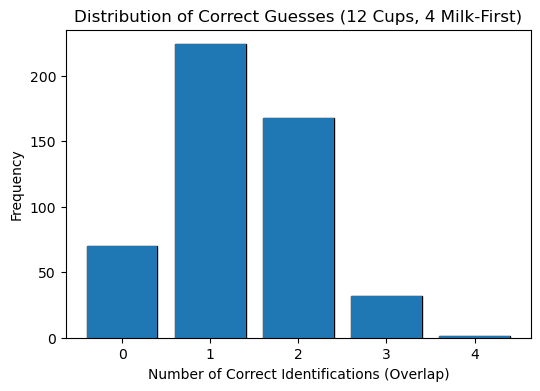

In [18]:
# Next 1 create a bar chart of how often each overlap (0–4) occurs.
fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(counts[0], counts[1], color="skyblue", edgecolor="black")

# Add labels and title for clarity.
ax.set_xlabel("Number of Correct Identifications (Overlap)")
ax.set_ylabel("Frequency")
ax.set_title("Distribution of Correct Guesses (12 Cups, 4 Milk-First)")

# Bar chart.
ax.bar(counts[0], counts[1]);

#### Conclusion

In this extended version of the Lady Tasting Tea experiment, 12 cups were prepared:
 - 4 with milk poured first
 - 8 with tea poured first.

The participant must correctly identify which 4 cups were milk-first.

In summary of the above Simulation Process
1.	I represented the cups as labeled numbers from 0–11.
2.	I used itertools.combinations() to generate all possible ways of choosing 4 cups from 12 (a total of 495 combinations).
3.	A random selection of 4 cups (simulating the participant’s guesses) was compared to every possible true combination.
4.	We computed how many cups overlapped between the guessed and true milk-first sets, and visualized the frequency of correct identifications (0–4 correct).

This confirmed that only 1 of 495 possible configurations corresponds to a perfect match — meaning that a participant choosing randomly has only a 1/495 ≈ 0.00202 (0.2%) chance of being completely correct by luck.

If we compare to the original experiment which was preparing 8 cups: 4 with milk poured first & 4 with tea poured first. The extended design is much more stringent. Random guessing is now almost 7 times less likely to succeed by chance compared to the original design.

| Design   | Total Cups | Milk-First | Chance of Perfect Guess |
|----------|------------|------------|--------------------------|
| Original | 8          | 4          | 1/70 ≈ 0.0143 (1.4%)     |
| Extended | 12         | 4          | 1/495 ≈ 0.0020 (0.2%)    |

Because the probability of a perfect score by guessing is much smaller in the extended experiment, this design provides stronger statistical evidence against random guessing.There is no reason to relax the p-value threshold (e.g., keep α = 0.05).

The simulation and combinatorial analysis both show that extending from 8 to 12 cups drastically lowers the probability of success by chance. A participant who correctly identifies all 4 milk-first cups in the 12-cup experiment would have provided very strong evidence that they truly can tell the difference between tea-first and milk-first preparation.

### End of Problem 1
________________________________________


## Problem 2: Normal Distribution

#### Introduction

For this problem I must generate 100,000 samples of size 10 from the standard normal distribution.
For each sample, compute the standard deviation with `ddof=1` (sample SD) and with `ddof=0` (population SD).
I must plot histograms of both sets of values on the same axes with transparency. I must describe the differences and 
explain how you expect these differences to change if the sample size is increased.


https://numpy.org/doc/stable/reference/generated/numpy.unique.html

[wikipedia: Degrees of freedom (statistics)](https://en.wikipedia.org/wiki/Degrees_of_freedom_(statistics))

[Demystifying Degrees Of Freedom With Visual Examples: A Beginner’s Guide](https://izen.ai/blog/demystifying-degrees-of-freedom-with-visual-examples-a-beginners-guide/)

[geeksforgeek: Degrees of Freedom](https://www.geeksforgeeks.org/maths/degrees-of-freedom/)

[statisticseasily: What is: Effective Degrees Of Freedom](https://statisticseasily.com/glossario/what-is-effective-degrees-of-freedom-explained/)

[statology: Understanding Degrees of Freedom in Statistics](https://www.statology.org/understanding-degrees-freedom-statistics/)

[statisticsassignmentexperts: Repeated Measures ANOVA: Degrees of Freedom, Sphericity, and Correction Factors](https://www.statisticsassignmentexperts.com/blog/repeated-measures-anova-degrees-freedom-sphericity.html)

[assignnmentinneed: About Degrees of Freedom: Their Formula and Their Relevance in Statistical Tests](https://www.assignnmentinneed.com/blog/about-degrees-of-freedom-their-formula-and-their-relevance-in-statistical-tests)



[Tidystat - good explanations on when to Use ddof=1 in np.std() - ](https://tidystat.com/when-to-use-ddof1-in-np-std/)

[sderev: Use ddof=1 for Sample Dispersion Measures with NumPy](https://sderev.com/notes/144/index.html)


Bessel’s Correction

https://en.wikipedia.org/wiki/Bessel%27s_correction

https://www.bing.com/videos/riverview/relatedvideo?q=Bessel%e2%80%99s+Correction&mid=DADF3644134CDE593E5EDADF3644134CDE593E5E&mcid=9A56DA0DBE5D49B0B676BAA78661680F&FORM=VIRE

https://www.geeksforgeeks.org/machine-learning/bessels-correction/


#### Imports

In [ ]:
# Numerical structures and operations.
# https://numpy.org/doc/stable/reference/index.html#reference
import numpy as np

# Plotting.
# https://matplotlib.org/stable/contents.html
import matplotlib.pyplot as plt

# Statistics.
# https://docs.scipy.org/doc/scipy/reference/stats.html
import scipy.stats as stats

# Statistical models.
# https://www.statsmodels.org/stable/index.html
import statsmodels as sm


#### Population Standard Deviation vs Sample Standard Deviation

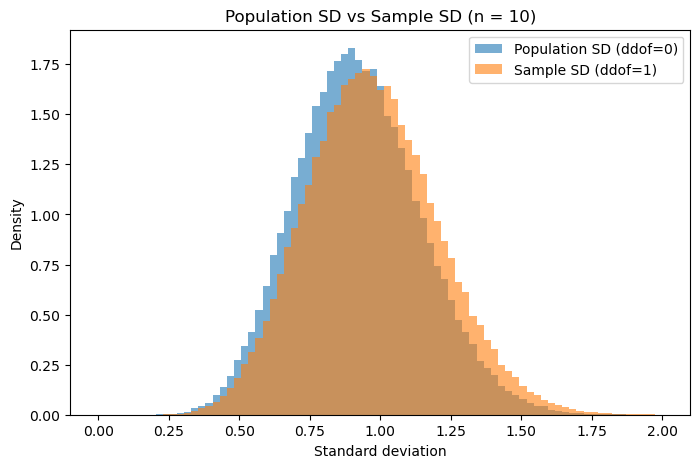

In [23]:
# Code & Plotting to compare population SD (ddof=0) and sample SD (ddof=1)

num_samples = 100000    # number of samples - 100,000 repeated experiments
n = 10                  # sample size - each experiment draws 10 items from a distribution       

# draw 100k samples of size 10
data = np.random.normal(loc=0, scale=1, size=(num_samples, n))

# generate SD with ddof=0 (population) and ddof=1 (sample)
sd_pop = np.std(data, axis=1, ddof=0)
sd_sample = np.std(data, axis=1, ddof=1)

# Plotting the distributions
fig, ax = plt.subplots(figsize=(8,5))

# Define bins
# from 0 (SD cannot be neg) to 2 (<1.8) with 80 bins (Freedman–Diaconis rule 80 bins)
bins = np.linspace(0, 2, 80)

ax.hist(sd_pop, bins=bins, density=True, alpha=0.6, label='Population SD (ddof=0)')
ax.hist(sd_sample, bins=bins, density=True, alpha=0.6, label='Sample SD (ddof=1)')

ax.set_xlabel("Standard deviation")
ax.set_ylabel("Density")
ax.set_title("Population SD vs Sample SD (n = 10)")
ax.legend()

plt.show()


#### Describe the differences


#### Increase Sample Size

#### Conclusion

#### End of Problem 2

***

## Problem 3: t-Tests

A type II error occurs when a test fails to reject the null hypothesis even though it is false.
For each mean difference $d = 0, 0.1, 0.2, \dots, 1.0$, repeat the following simulation 1,000 times:

1. Draw two samples of size 100, one from the standard normal distribution and one from the normal distribution with mean $d$ and standard deviation 1.
2. Run an independent samples t-test on the two samples, rejecting the null hypothesis if the p-value is less than 0.05.
3. Record the proportion of times the null hypothesis is not rejected.

Plot this proportion against $d$, and explain how the type II error rate changes as the difference in means increases.


## Problem 4: ANOVA

Generate three independent samples, each of size 30, from normal distributions with means 0, 0.5, and 1, each with standard deviation 1.

1. Perform a one-way ANOVA to test whether all three means are equal.
2. Perform three independent two-sample t-tests: samples 1 vs 2, 1 vs 3, and 2 vs 3.
3. Compare the conclusions.

Write a short note on why ANOVA is preferred over running several t-tests.